<a href="https://colab.research.google.com/github/hazerr/mlzoomcamp/blob/main/homework2_mlzoomcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [ ]:

df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv")


In [ ]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

<Axes: xlabel='median_house_value', ylabel='Count'>

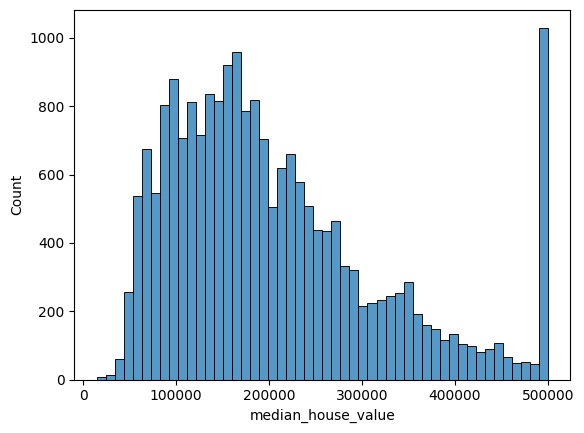

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sea


sea.histplot(df.median_house_value, bins=50)

In [ ]:
df_refined = df[
    df['ocean_proximity'].isin(["INLAND","<1H OCEAN"])
]

In [ ]:
df_refined = df_refined.drop("ocean_proximity", axis=1)

Question 1

In [ ]:
df_refined.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

Question 2

In [ ]:
df_refined.population.describe()['50%']

1195.0

Prepare and split the dataset

In [ ]:
import numpy as np

df_refined['median_house_value'] = np.log1p(df_refined.median_house_value)

np.random.seed(42)

n = len(df_refined)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuf = df_refined.iloc[idx]

df_train = df_shuf.iloc[:n_train].copy()
df_val = df_shuf.iloc[n_train:n_train+n_val].copy()
df_test = df_shuf.iloc[n_train+n_val:].copy()

y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [ ]:
df_train

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
19963    -119.14     36.23                22.0       2935.0           523.0   
5929     -117.79     34.12                16.0       2426.0           426.0   
11377    -117.97     33.68                26.0       3653.0           568.0   
6443     -118.03     34.10                32.0       2668.0           609.0   
17546    -121.87     37.34                39.0       2479.0           541.0   
...          ...       ...                 ...          ...             ...   
20157    -119.15     34.44                33.0       2005.0           392.0   
20005    -119.13     36.13                28.0       1673.0           385.0   
6691     -118.08     34.13                46.0       1238.0           147.0   
3470     -118.46     34.29                24.0       3668.0           890.0   
5498     -118.41     34.00                18.0       1307.0           441.0   

       population  households  median_income  
19963      1927.0       530.0         2.5875  
5929       1319.0       446.0         4.8125  
11377      1930.0       585.0         5.7301  
6443       1512.0       541.0         2.9422  
17546      1990.0       506.0         2.4306  
...           ...         ...            ...  
20157      1043.0       351.0         5.3080  
20005      1434.0       371.0         2.0586  
6691        377.0       145.0         8.4546  
3470       3151.0       810.0         3.0526  
5498        884.0       456.0         2.9338  

[9413 rows x 8 columns]

Question 3

In [ ]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

def prepare_X(df, value):
    df = df.fillna(value)
    X = df.values
    return X

fill with 0

In [ ]:
X_train = prepare_X(df_train, value=0)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, value=0)
y_pred = w_0 + X_val.dot(w)
print('RMSE:', round(rmse(y_val, y_pred), 2))

RMSE: 0.34


In [ ]:
X_train = prepare_X(df_train, value=df_train.total_bedrooms.mean())
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, value=df_train.total_bedrooms.mean())
y_pred = w_0 + X_val.dot(w)
print('RMSE:', np.round(rmse(y_val, y_pred), 2))

RMSE: 0.34


Question 4

In [ ]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

X_train = prepare_X(df_train, value=0)
X_val = prepare_X(df_val, value=0)

options = [0, 0.000001, 0.001, 0.0001]

# Initializing variables to track the best RMSE and corresponding r
best_rmse = float('inf')
best_r = None

# Iterating through different regularization strengths
for r in options:

    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    # Make predictions on the validation dataset
    y_pred = w0 + X_val.dot(w)


    current_rmse = rmse(y_val, y_pred)


    if current_rmse < best_rmse:
        best_rmse = current_rmse
        best_r = r


best_rmse = round(best_rmse, 2)

print(f"Best RMSE: {best_rmse} with r={best_r}")

Best RMSE: 0.34 with r=0


Question 5

In [ ]:
def prepare_X(df):
    df_num = df.copy()
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [ ]:


rmse_scores = []

seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for seed in seed_values:
    # Splitting the data with the current seed
    np.random.seed(seed)
    n = len(df_refined)
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuf = df_refined.iloc[idx]

    df_train = df_shuf.iloc[:n_train].copy()
    df_val = df_shuf.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuf.iloc[n_train+n_val:].copy()

    y_train = df_train.median_house_value.values
    y_val = df_val.median_house_value.values
    y_test = df_test.median_house_value.values

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    # Filling missing values with 0
    df_train.fillna(0, inplace=True)
    df_val.fillna(0, inplace=True)
    df_test.fillna(0, inplace=True)

    # Training a model without regularization
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train)

    # Making predictions on the validation dataset
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    # Calculating RMSE
    current_rmse = rmse(y_val, y_pred)

    rmse_scores.append(current_rmse)

for seed, rmse in zip(seed_values, rmse_scores):
    print(f"For seed s = {seed}, the RMSE is: {rmse}")

std_deviation = np.std(rmse_scores)
print(f"Standard Deviation of RMSE scores: {std_deviation:.3f}")

For seed s = 0, the RMSE is: 0.33773871600617067
For seed s = 1, the RMSE is: 0.33779993536592057
For seed s = 2, the RMSE is: 0.3384287006764452
For seed s = 3, the RMSE is: 0.33200494683066245
For seed s = 4, the RMSE is: 0.33944518625587833
For seed s = 5, the RMSE is: 0.3433819705275092
For seed s = 6, the RMSE is: 0.33853302117633244
For seed s = 7, the RMSE is: 0.3468747697295045
For seed s = 8, the RMSE is: 0.3512736865957643
For seed s = 9, the RMSE is: 0.3341558266506289
Standard Deviation of RMSE scores: 0.005


Question 6

In [ ]:
np.random.seed(9)

n = len(df_refined)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuf = df_refined.iloc[idx]

df_train = df_shuf.iloc[:n_train].copy()
df_val = df_shuf.iloc[n_train:n_train+n_val].copy()
df_test = df_shuf.iloc[n_train+n_val:].copy()


df_combined = pd.concat([df_train, df_val])

df_combined.reset_index(drop=True, inplace=True)

del df_combined['median_house_value']
del df_test['median_house_value']

In [ ]:
# Preparing the data for training
X_train_val = prepare_X(df_combined)
X_test = prepare_X(df_test)


w0, w = train_linear_regression_reg(X_train_val, np.concatenate([y_train, y_val]), r=0.001)

# Making predictions on the test dataset
y_pred_test = w0 + X_test.dot(w)

def calculate_rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

rmse_test = calculate_rmse(y_test, y_pred_test)
print(f"RMSE on the test dataset: {rmse_test:.2f}")

RMSE on the test dataset: 0.33
